**YOLO v5 Installation**

**Cloning YOLO v5**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 14298, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 14298 (delta 62), reused 65 (delta 31), pack-reused 14194
Receiving objects: 100% (14298/14298), 13.39 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (9872/9872), done.


# Connect and Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Installing Yolov5 requirements.txt

In [ ]:
! pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 44.2 MB/s 


# Install wandb

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 34.2 MB/s 
     |████████████████████████████████| 166 kB 62.0 MB/s 
     |████████████████████████████████| 182 kB 69.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 162 kB 67.4 MB/s 
     |████████████████████████████████| 162 kB 74.7 MB/s 
     |████████████████████████████████| 158 kB 78.2 MB/s 
     |████████████████████████████████| 157 kB 75.4 MB/s 
     |████████████████████████████████| 157 kB 77.1 MB/s 
     |████████████████████████████████| 157 kB 78.7 MB/s 
     |████████████████████████████████| 157 kB 73.8 MB/s 
     |████████████████████████████████| 157 kB 77.9 MB/s 
     |████████████████████████████████| 157 kB 78.4 MB/s 
     |████████████████████████████████| 157 kB 76.2 MB/s 
     |████████████████████████████████| 156 kB 76.8 MB/s 
  Created wheel for pathtools: fi

# Import and login to wandb

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Train with pretraind mode Small


---
Batch size 16 with epoche 100



In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5s.pt

train: weights=yolov5/yolov5s.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train Result : 
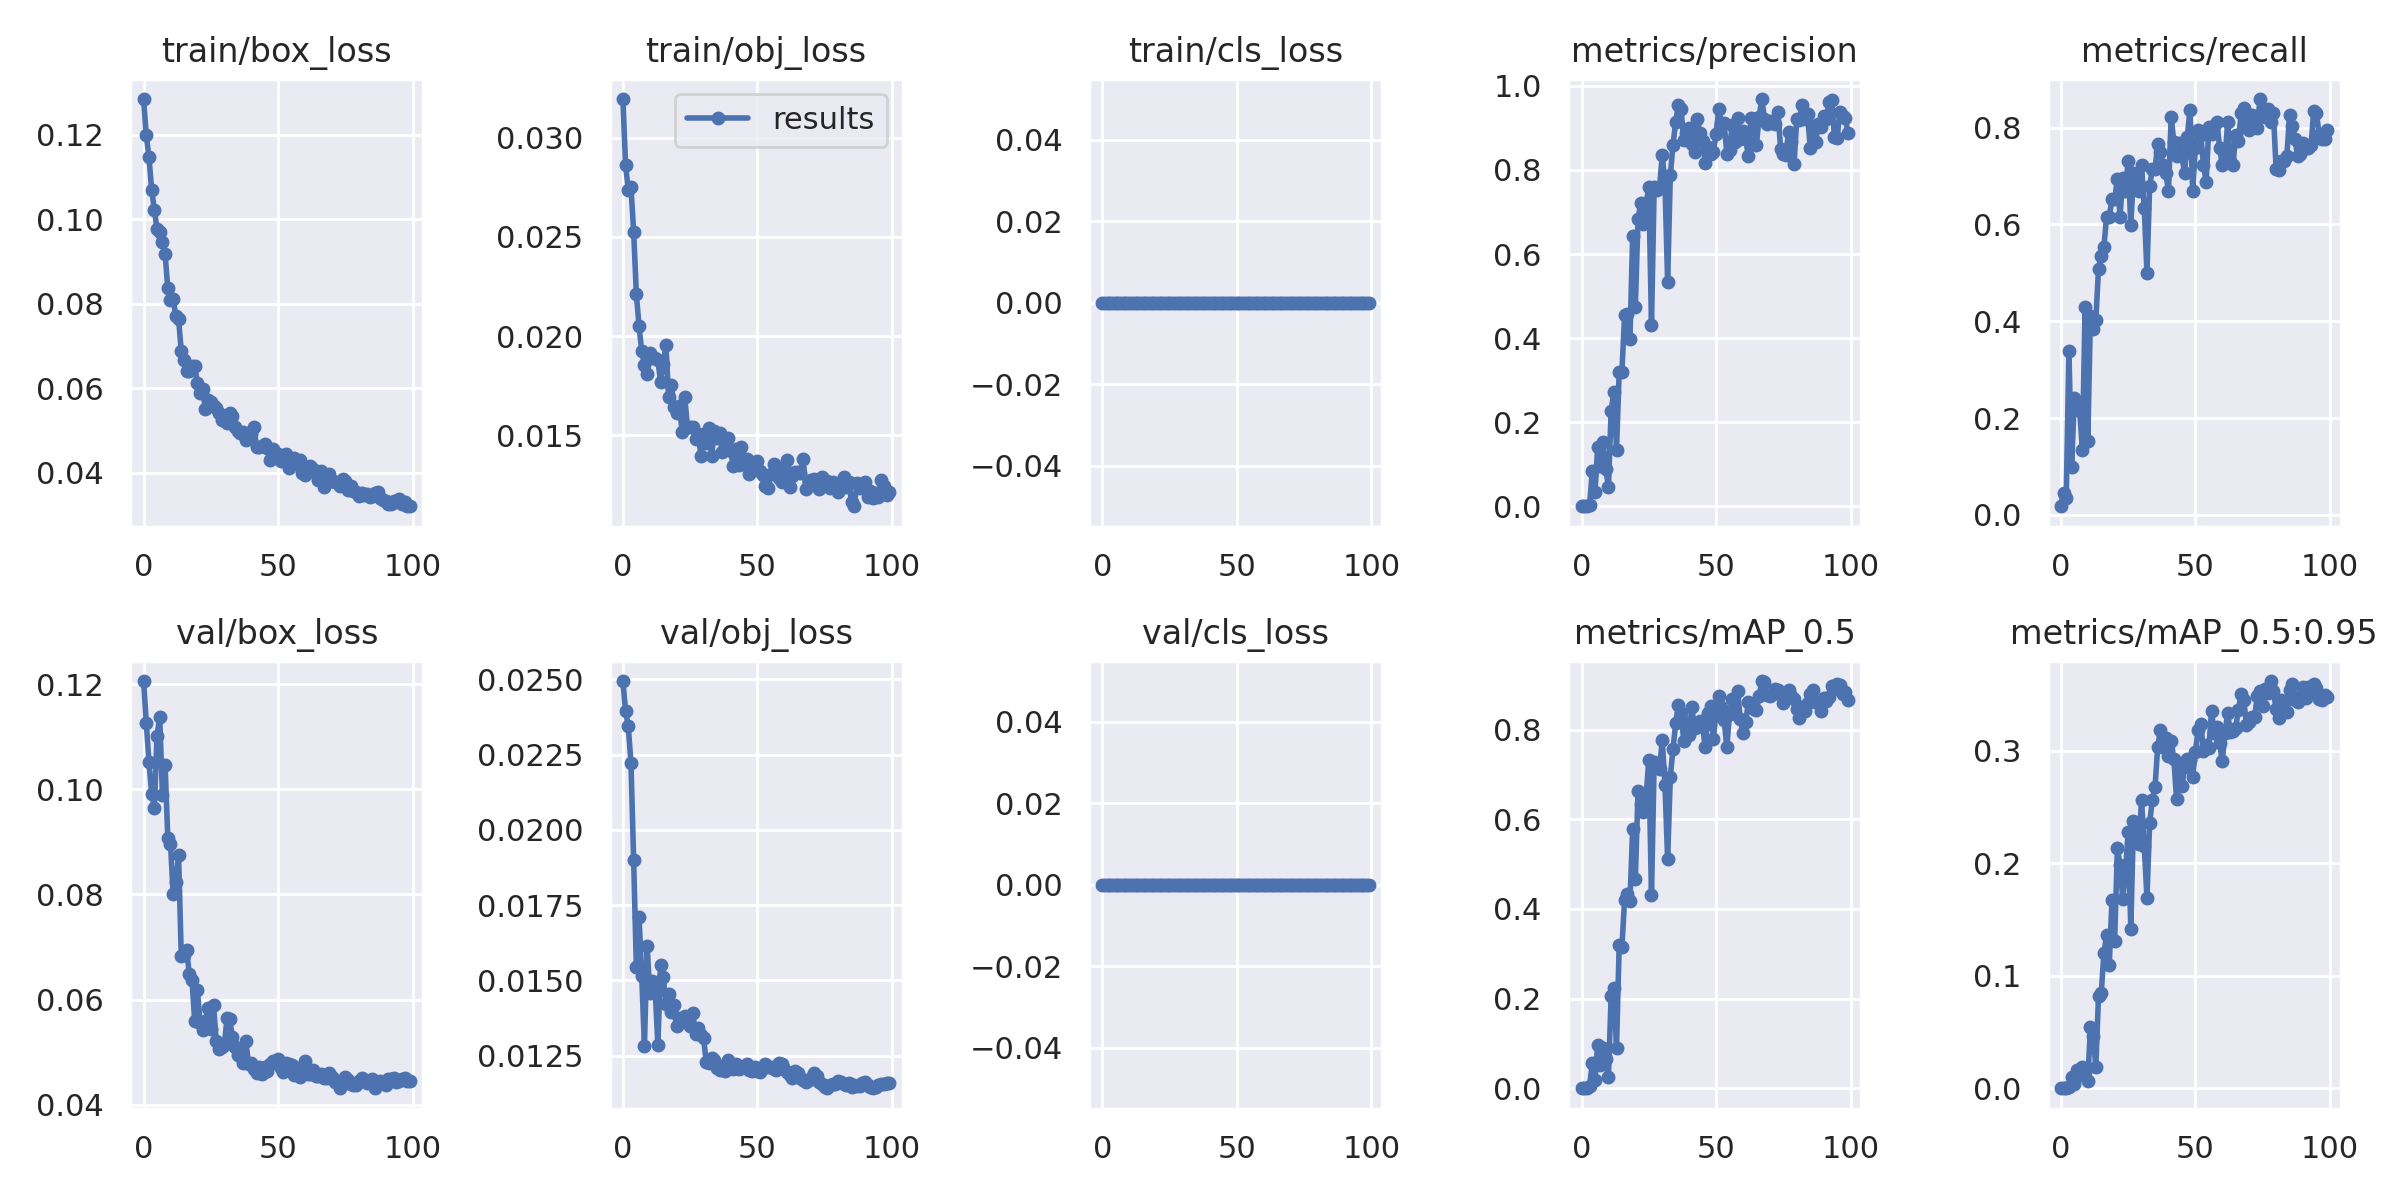

Run detection on train Small (16 batch with 100 epoche)

In [ ]:
!python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp/weights/best.pt'

detect: weights=['yolov5/runs/train/exp/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 12.7ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 2 plates, 13.4ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 14.9ms
image 4/43 /con

run **Test** Task over Small train to calculate mAP

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels' images and labels...15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<00:00, 251.46it/s]
test: New cache created: /content/yolov5/dataset/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.35s/it]
                   all         15         37      0.765      0.865       0.83      0.306
Speed: 0.2ms pr

# Train with pretraind mode Small

---
batch size 32 with epochs 100


In [ ]:
! python yolov5/train.py --img 640 --batch 32 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5s.pt

train: weights=yolov5/yolov5s.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train result:
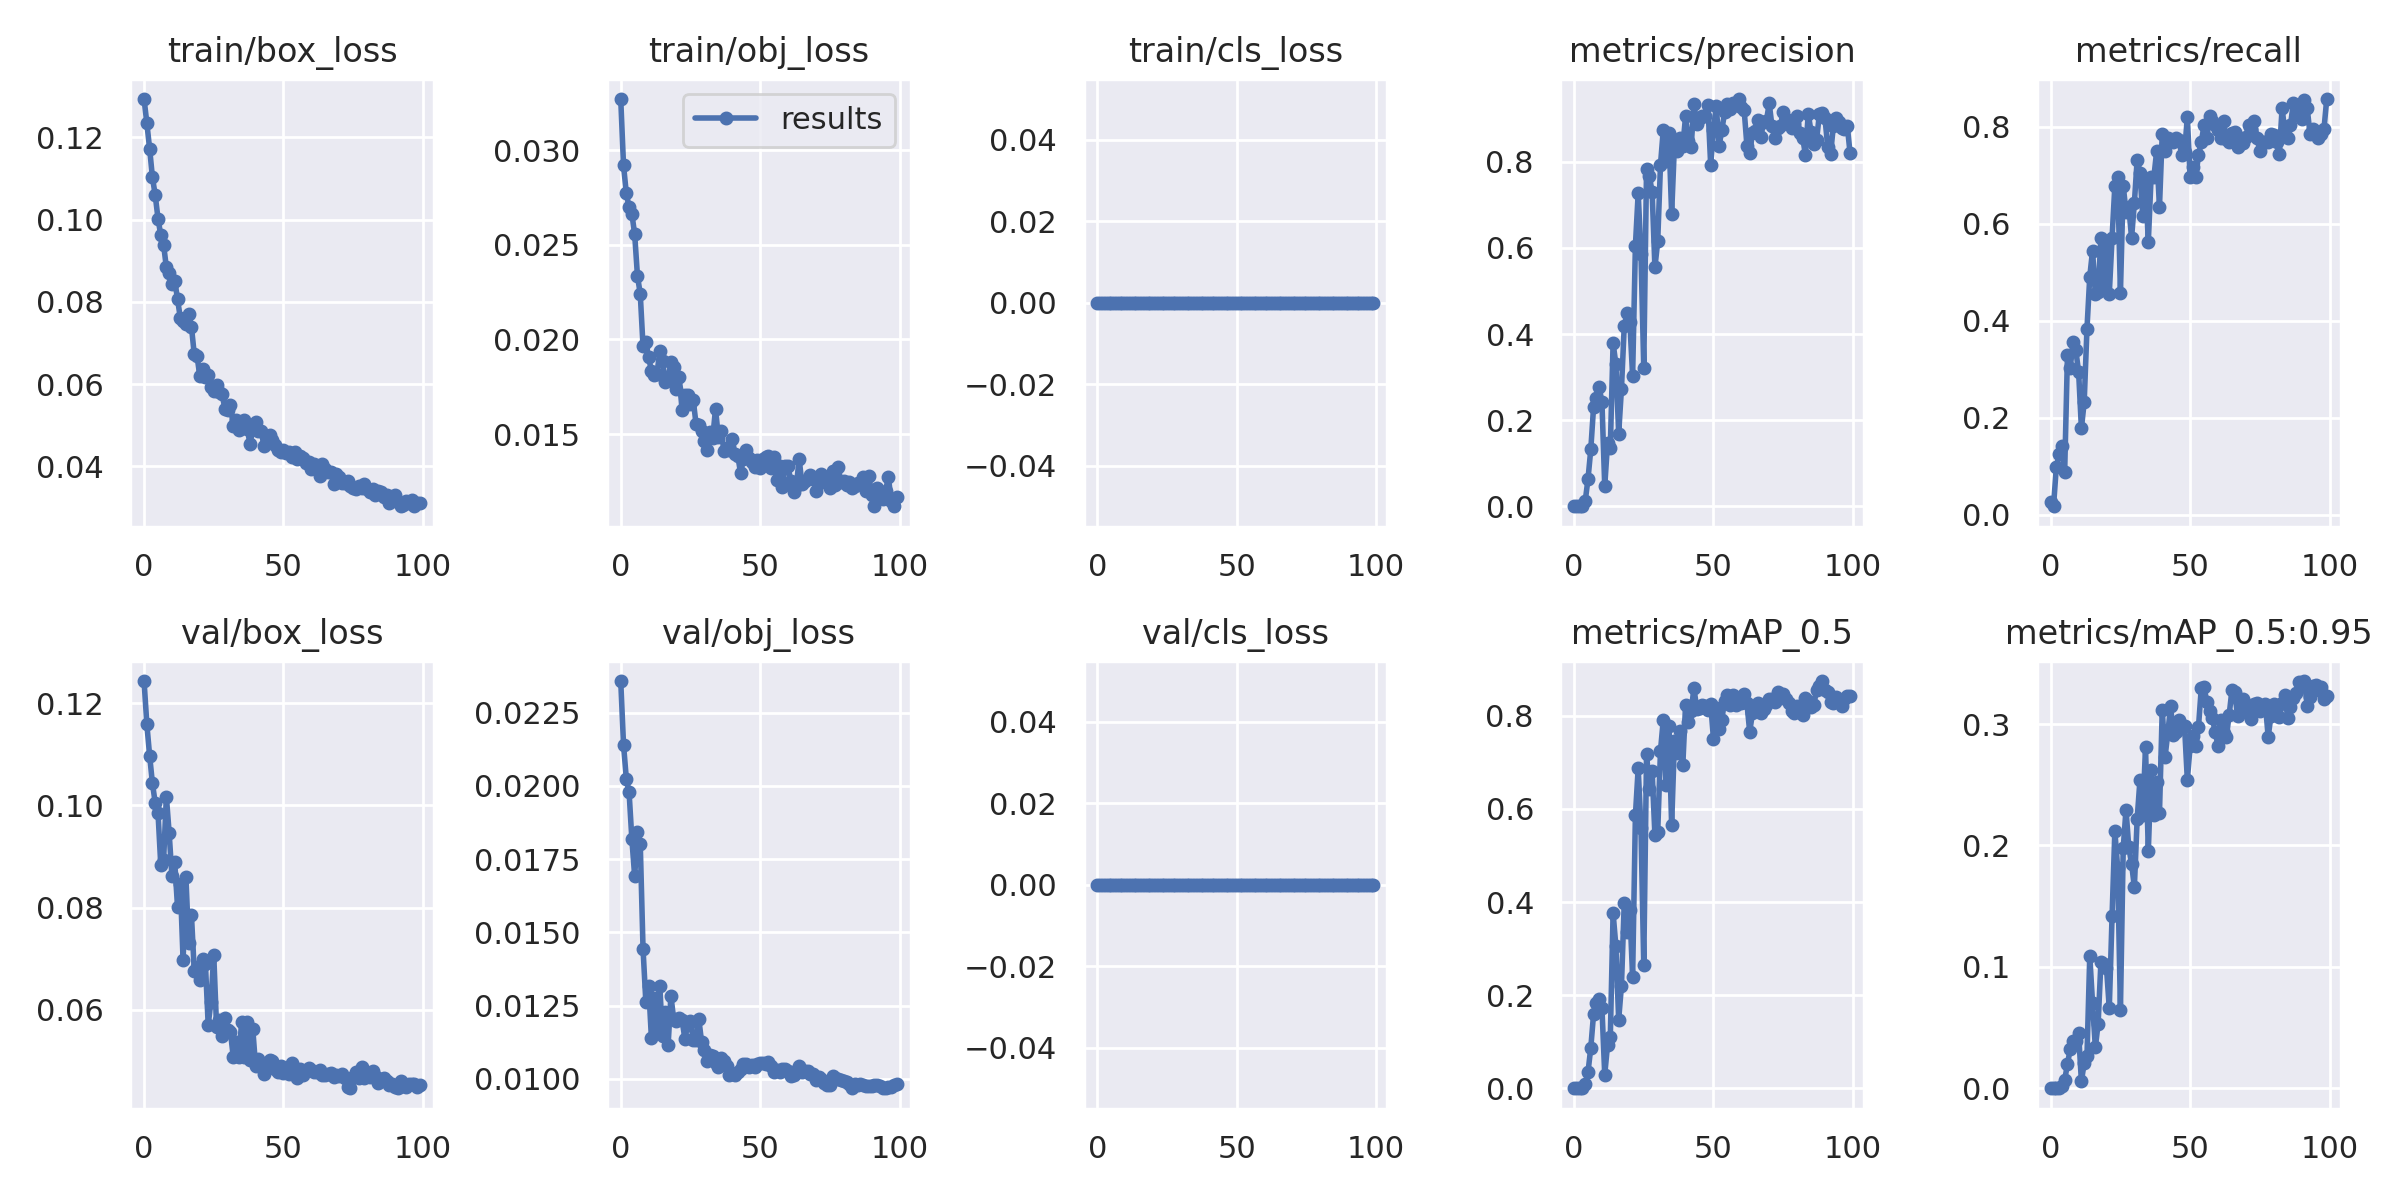

Run **detection** over Small train with batch size 32 and epoch 100

In [ ]:
!python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp2/weights/best.pt'

detect: weights=['yolov5/runs/train/exp2/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 11.4ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 2 plates, 13.7ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 13.3ms
image 4/43 /co

Run Task test to Calculate mAP

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp2/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.35s/it]
                   all         15         37      0.925      0.838       0.88      0.284
Speed: 0.2ms pre-process, 6.4ms inference, 2.4ms NMS per image at shape (32, 3, 640

# Train with pretraind mode Medium

---

batch size 16 with epochs 100

In [ ]:
! python yolov5/train.py --img 640 --batch 16 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5m.pt

train: weights=yolov5/yolov5m.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train result: 
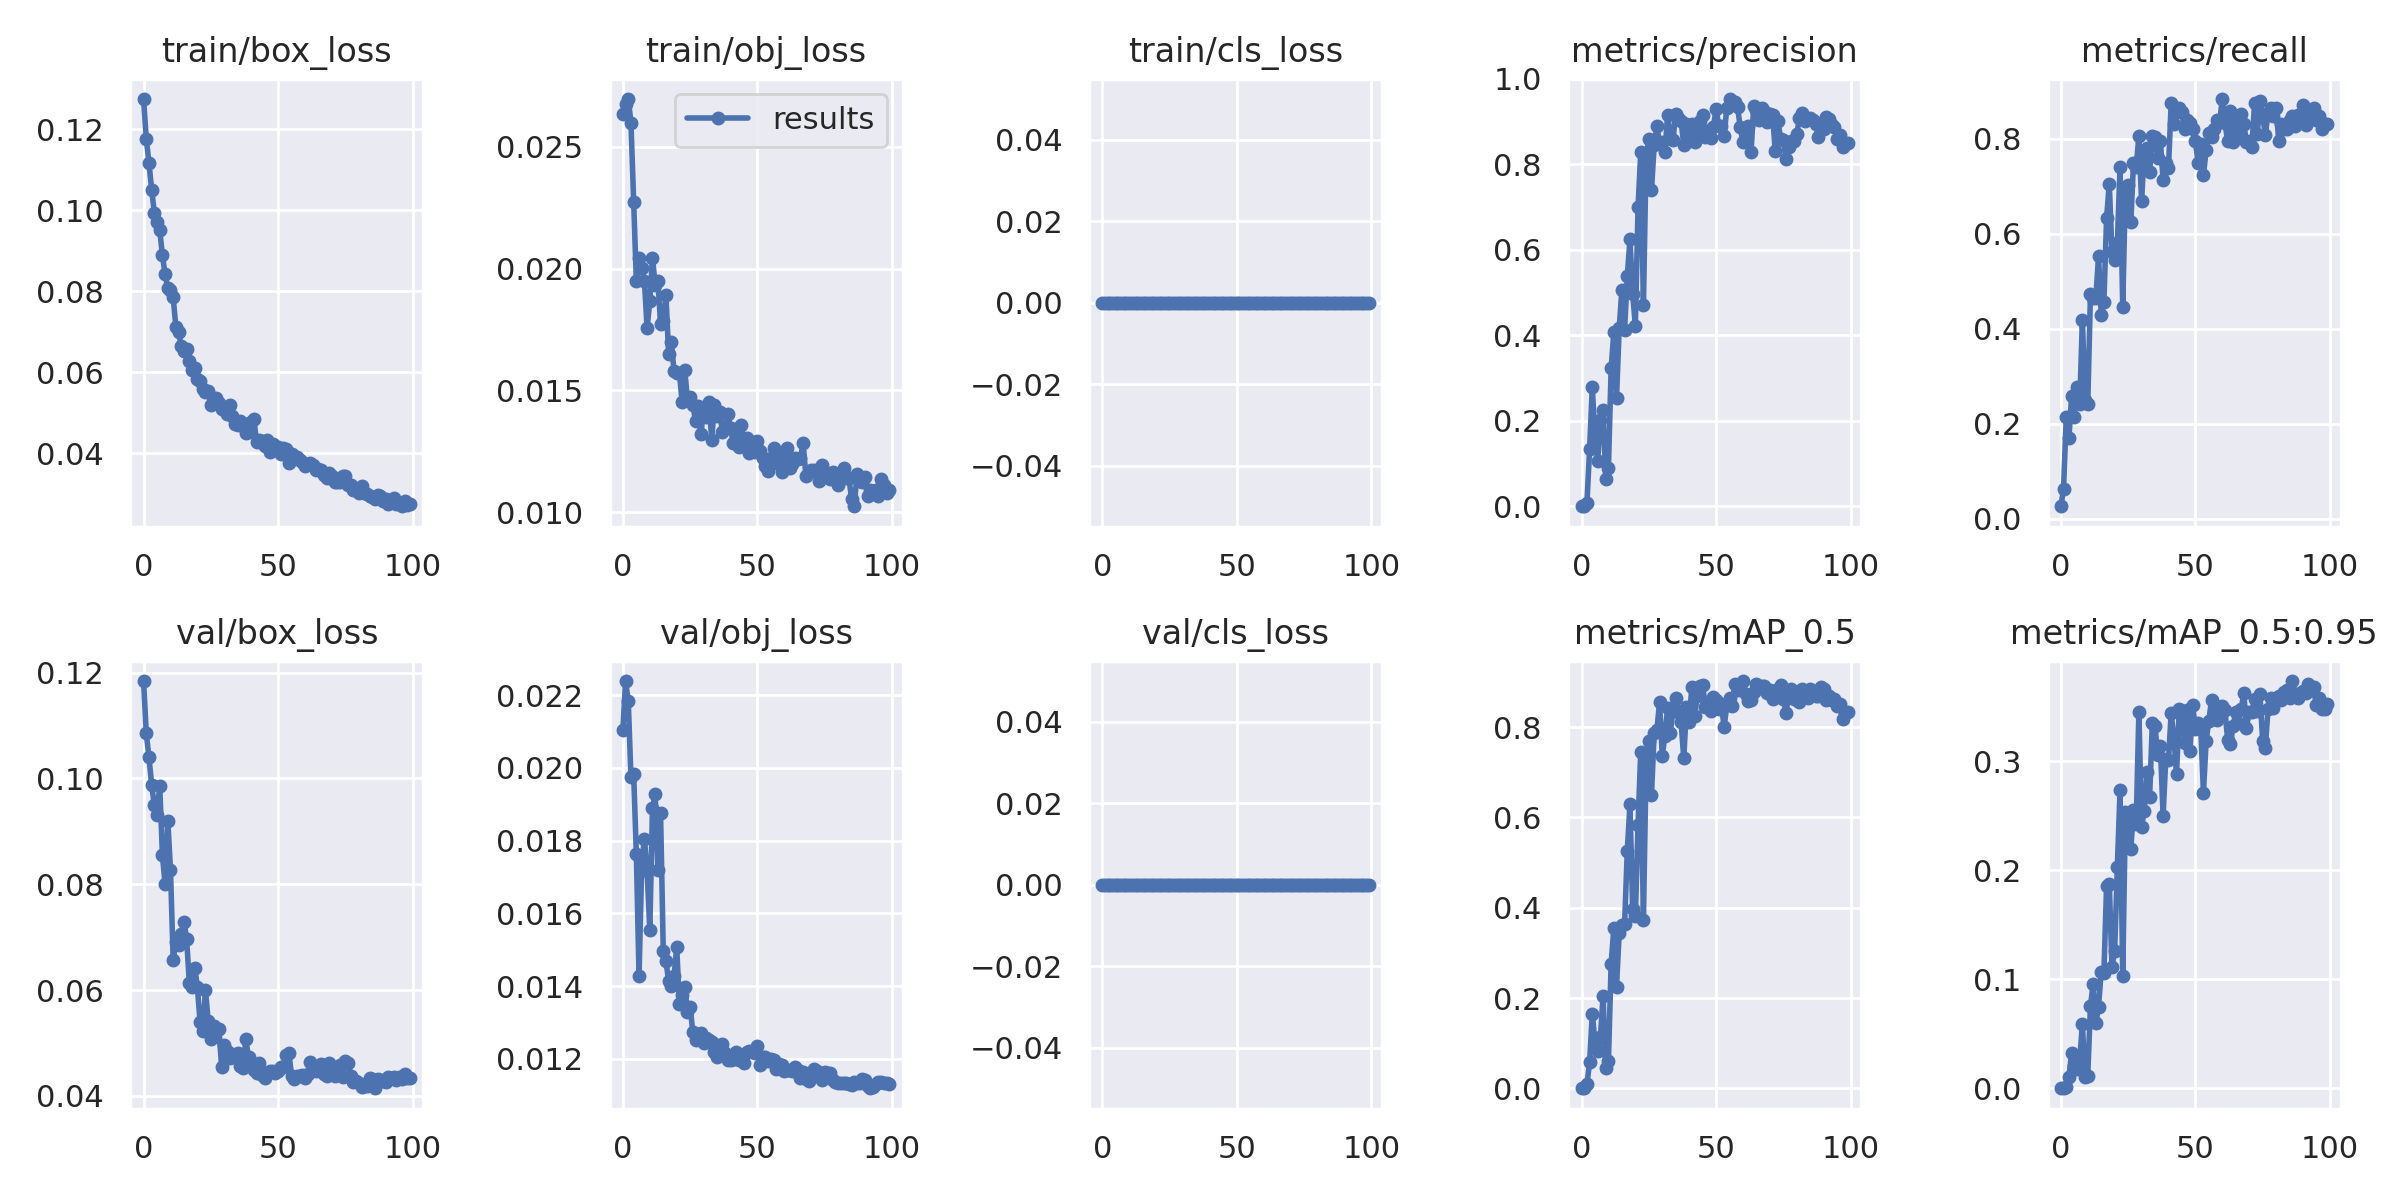

Run dection on Medium train result with batch size 16 over 100 epochs

In [ ]:
!python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp3/weights/best.pt'

detect: weights=['yolov5/runs/train/exp3/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 22.3ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 3 plates, 22.8ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 21.8ms
image 4/43 /c

Run Task Test and calculte mAP

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp3/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.35s/it]
                   all         15         37      0.917      0.757      0.845      0.332
Speed: 0.2ms pre-process, 17.2ms inference, 1.2ms NMS per image at shape (32, 3, 6

# Train with pretraind mode Medium 

---
batch size 32 with epochs 100

Best result 

In [ ]:
! python yolov5/train.py --img 640 --batch 32 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5m.pt

train: weights=yolov5/yolov5m.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train result:
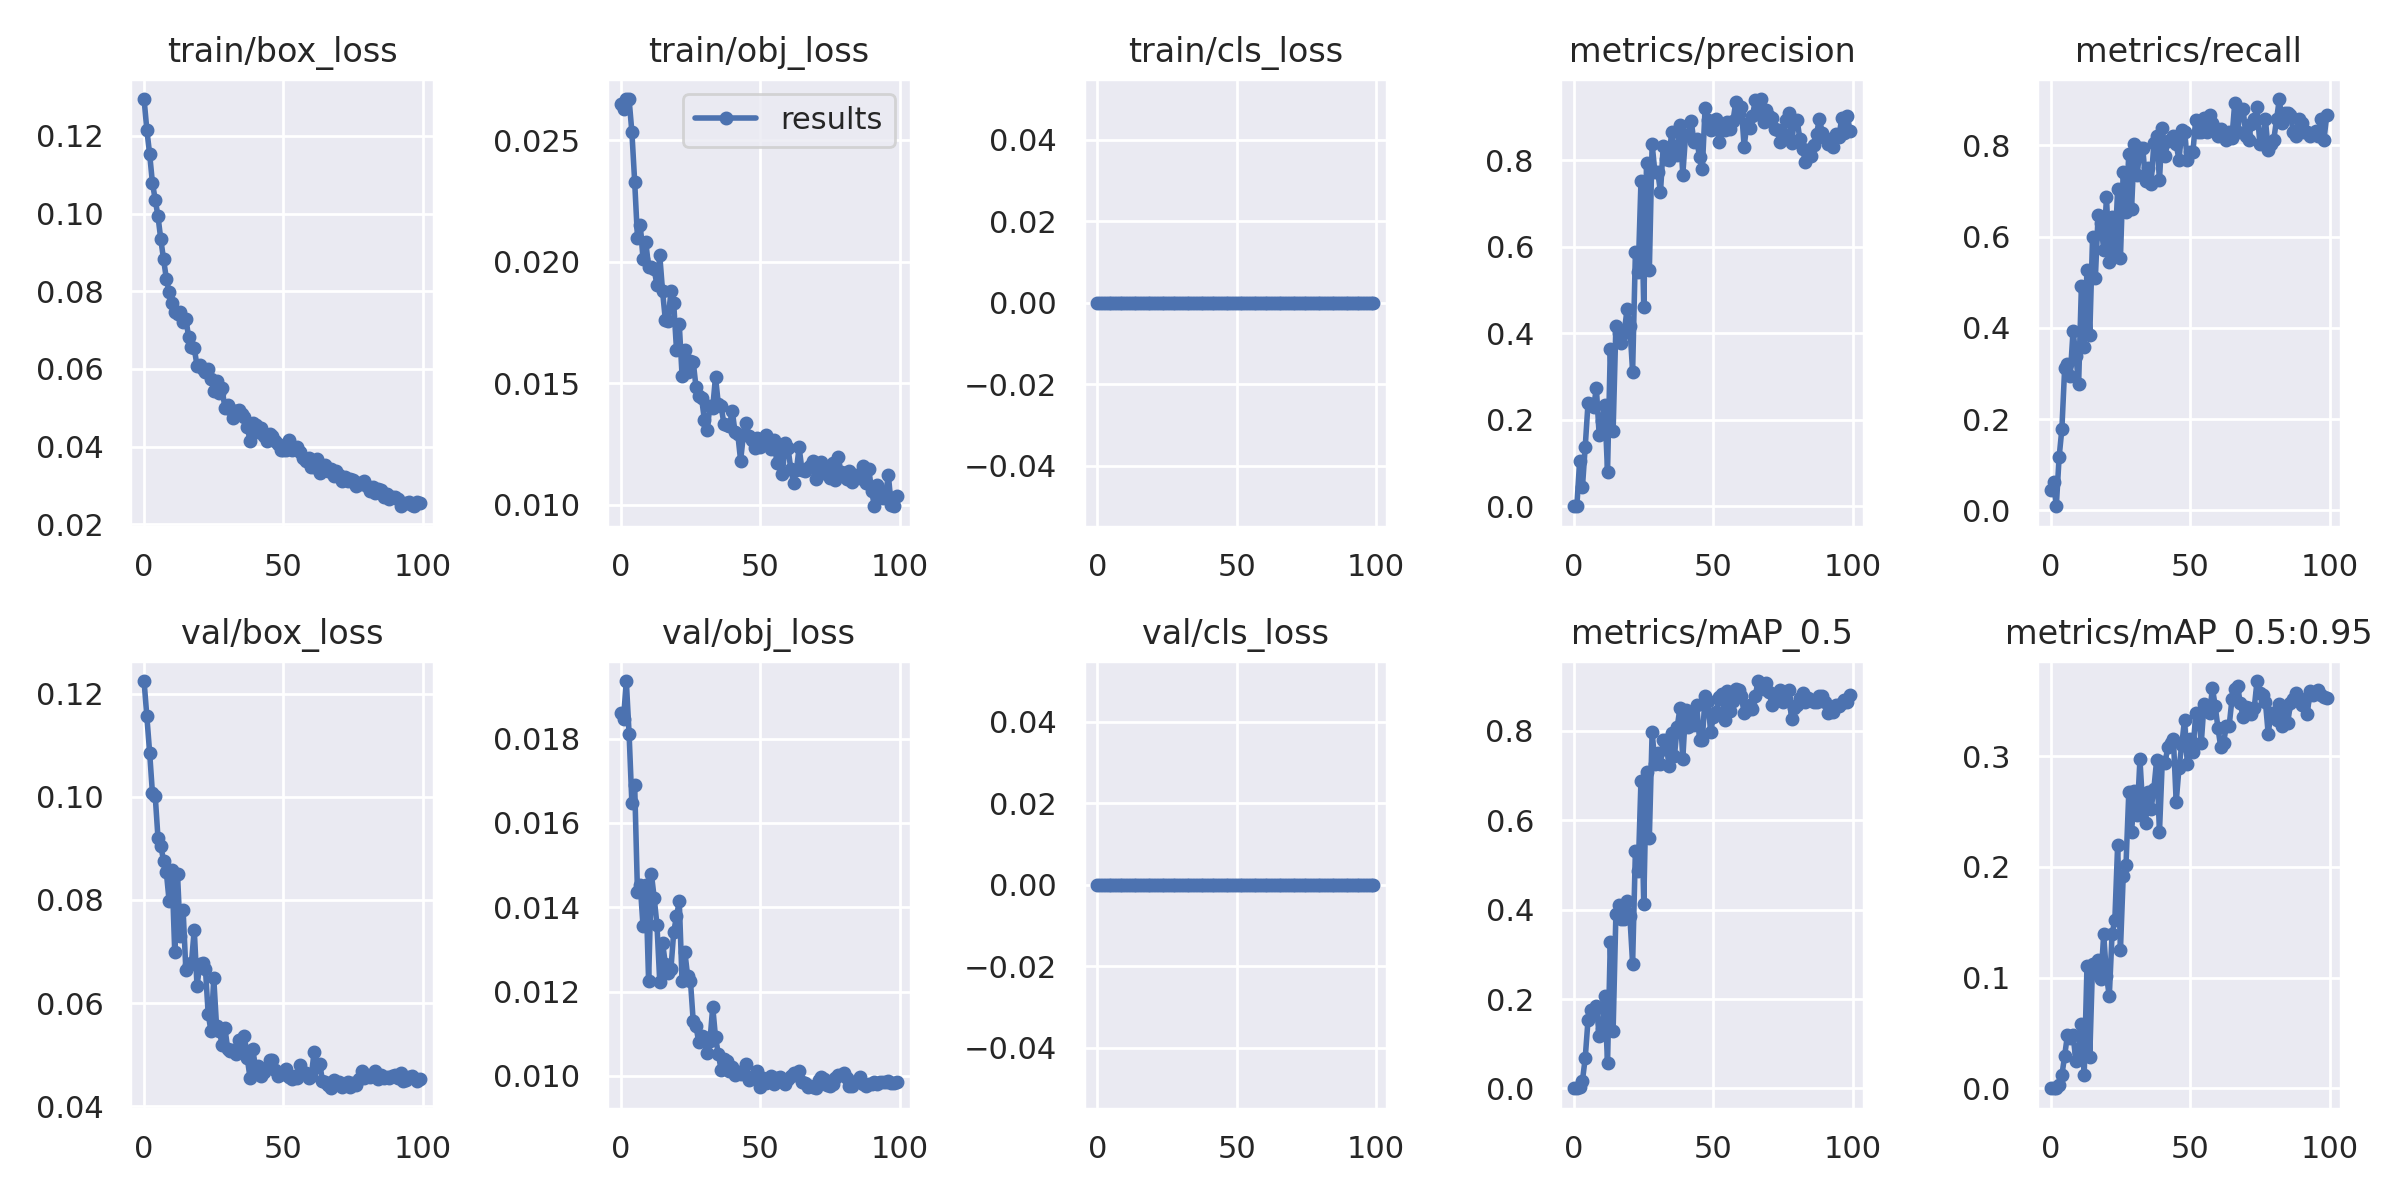

Run dection over trained result of medium (batch size 32 over 100 epochs)

In [ ]:
! python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp4/weights/best.pt'

detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 22.9ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 3 plates, 23.4ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 22.2ms
image 4/43 /c

Run task test and calculate mAP over train result 

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp4/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.41s/it]
                   all         15         37      0.939      0.825      0.869      0.326
Speed: 0.2ms pre-process, 14.6ms inference, 2.0ms NMS per image at shape (32, 3, 6

# Train with pretrains Large Model

---
batch size 16 with epochs 100


In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5l.pt

train: weights=yolov5/yolov5l.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train result: 
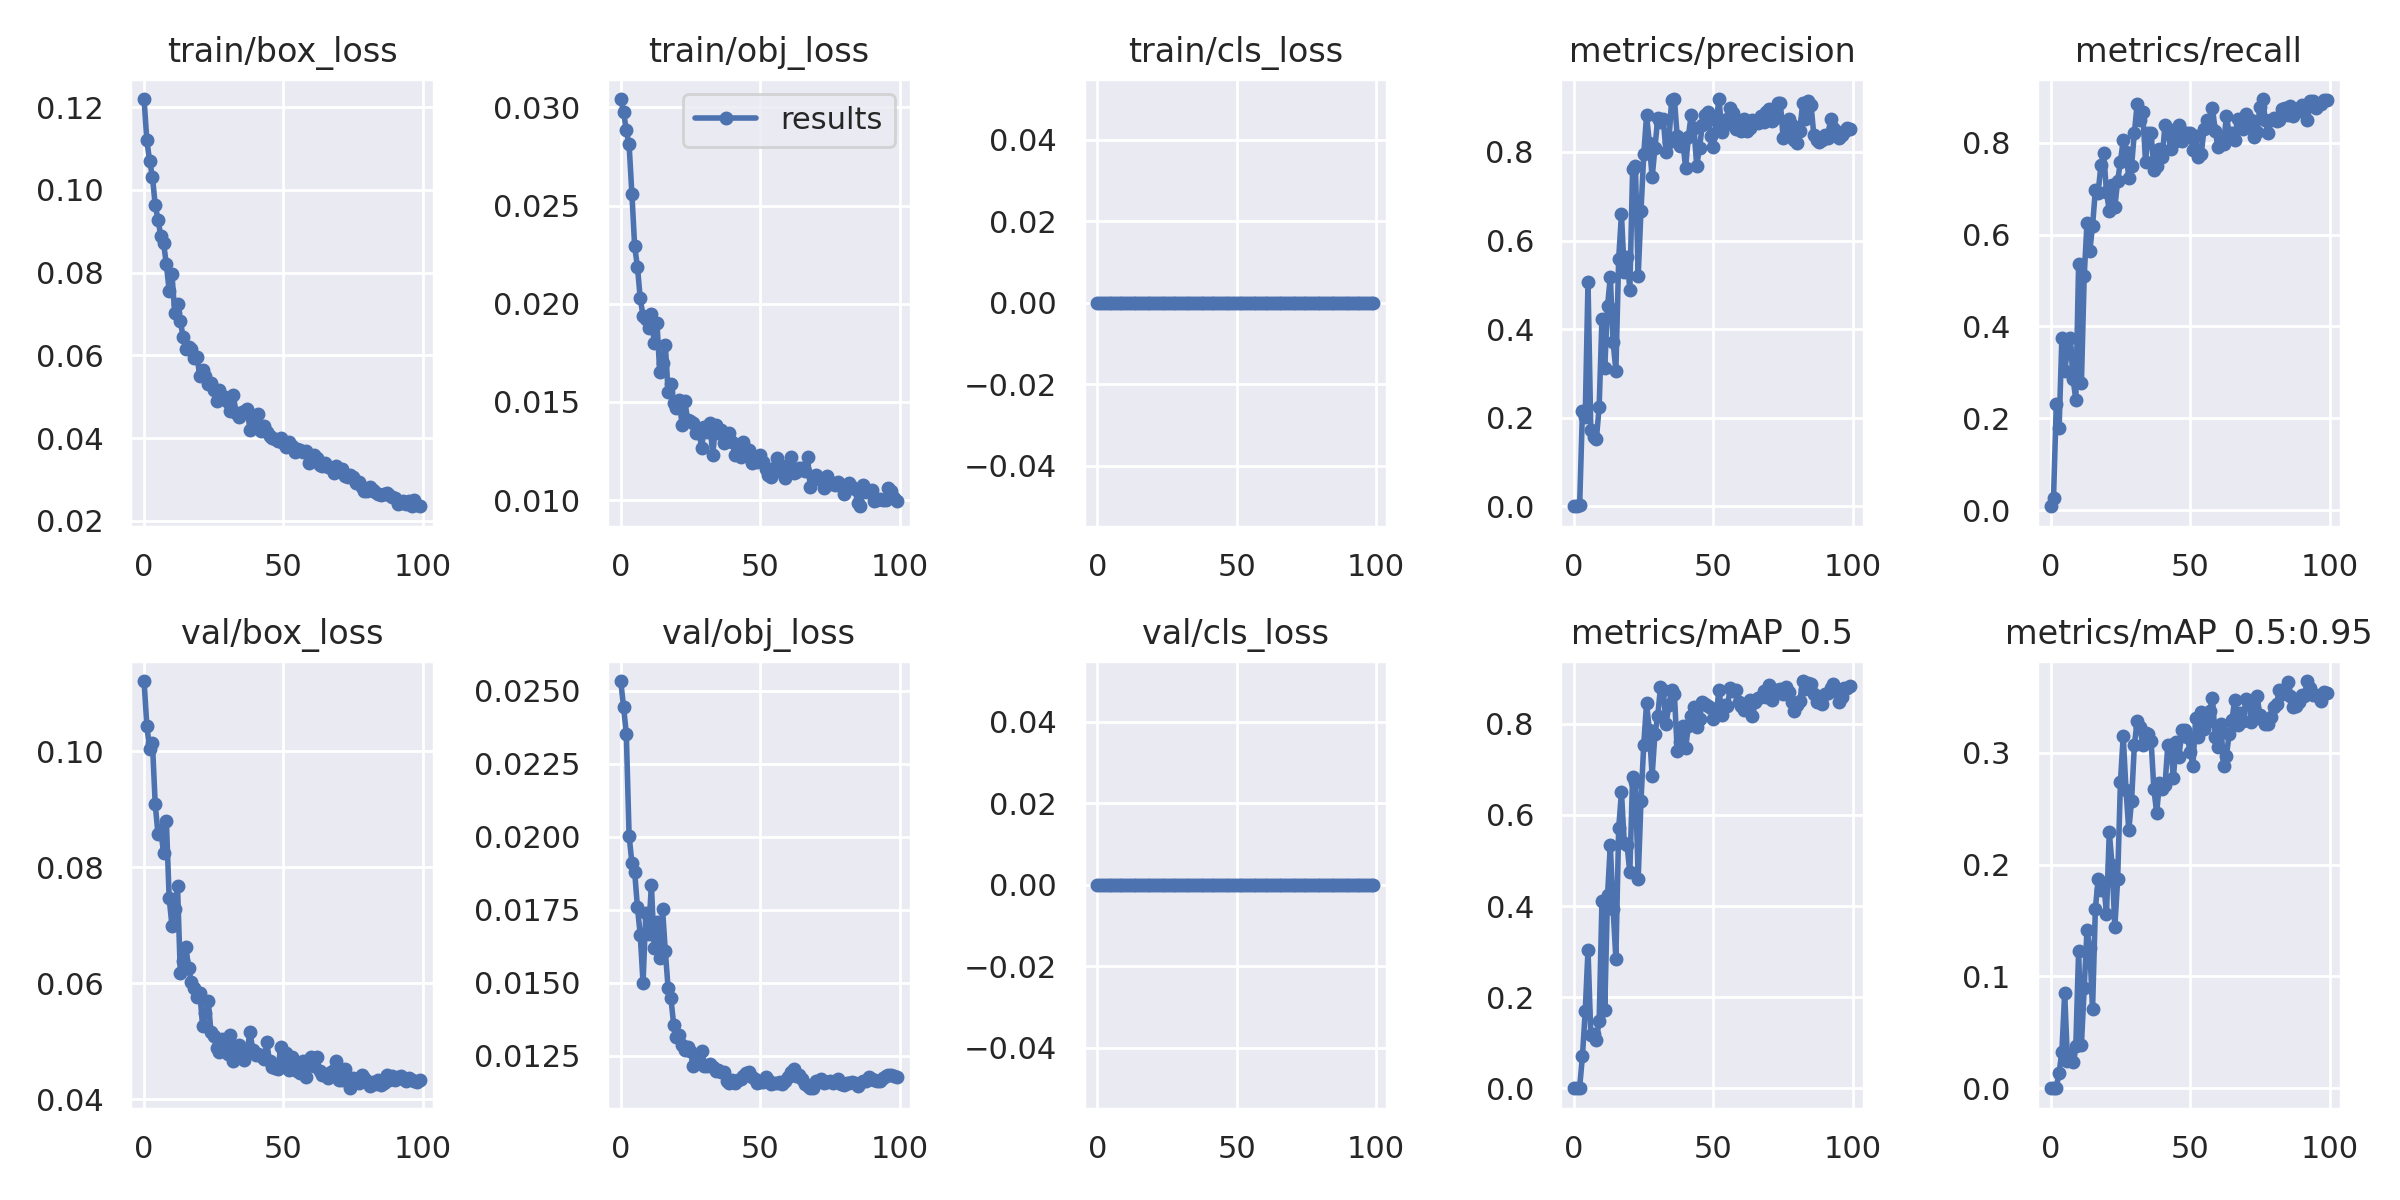

Run detection over train result

In [ ]:
!python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp5/weights/best.pt'

detect: weights=['yolov5/runs/train/exp5/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 42.6ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 2 plates, 33.5ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 28.4ms
image 4/43 /

Run Test task over train result 

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp5/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.59s/it]
                   all         15         37      0.905      0.784      0.838      0.323
Speed: 0.2ms pre-process, 26.2ms inference, 2.1ms NMS per image at shape (32, 3, 

#Train with pretrain Large Model

---
batch size 20 with epochs 100


In [ ]:
!python yolov5/train.py --img 640 --batch 20 --epochs 100 --data yolov5/dataset.yaml --weights yolov5/yolov5l.pt

train: weights=yolov5/yolov5l.pt, cfg=, data=yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

Train result:
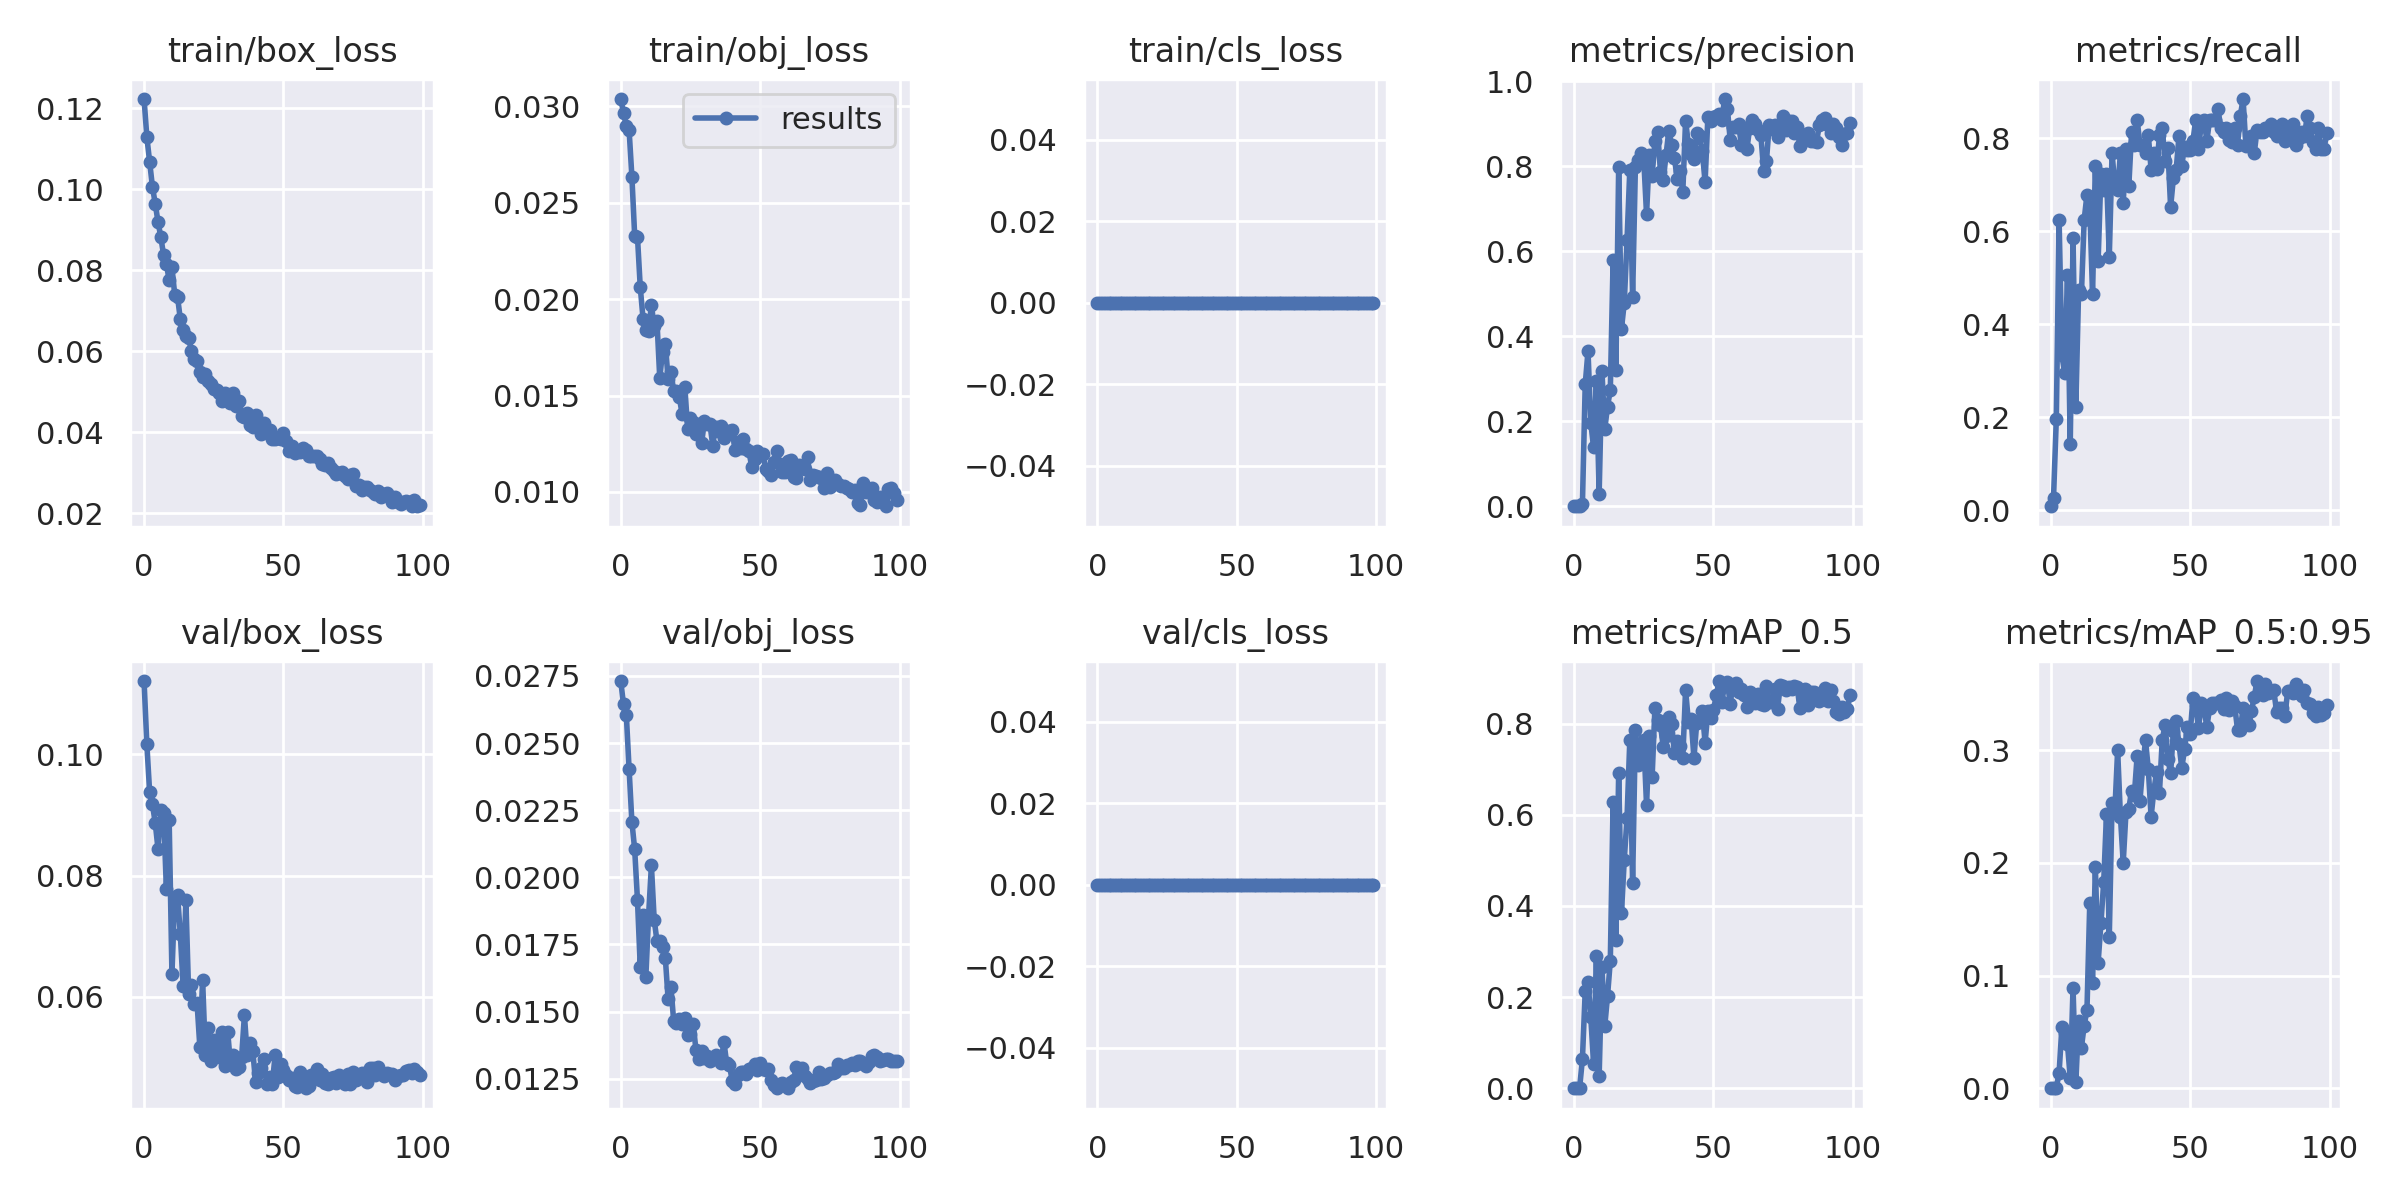

Run detection over train result

In [ ]:
!python yolov5/detect.py --source yolov5/dataset/val/images --weights 'yolov5/runs/train/exp6/weights/best.pt'

detect: weights=['yolov5/runs/train/exp6/weights/best.pt'], source=yolov5/dataset/val/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/43 /content/yolov5/dataset/val/images/cd622b05-vlcsnap-00211.jpg: 448x640 3 plates, 42.0ms
image 2/43 /content/yolov5/dataset/val/images/ce1ff0aa-07072011003.jpg: 480x640 2 plates, 33.9ms
image 3/43 /content/yolov5/dataset/val/images/ceec01a7-C0007_2.MP4_frame_1000.jpg: 384x640 2 plates, 27.7ms
image 4/43 /

Run Test task over train result to calculate mAP

In [ ]:
!python yolov5/val.py --task test --data yolov5/dataset.yaml --weights 'yolov5/runs/train/exp6/weights/best.pt'

val: data=yolov5/dataset.yaml, weights=['yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-203-g6371de8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/yolov5/dataset/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.43s/it]
                   all         15         37      0.915      0.757      0.821      0.317
Speed: 0.2ms pre-process, 24.9ms inference, 2.0ms NMS per image at shape (32, 3, 